In [1]:
import numpy as np
import matplotlib.pyplot as plt

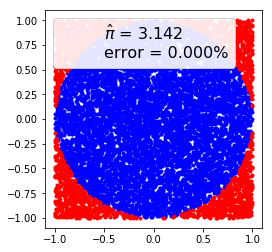

In [2]:
N = 10000

x,y = np.random.uniform(-1,1,size=(2,N))
inside = (x**2 + y**2) <= 1
pi = inside.sum() * 4/N
error = abs((pi - np.pi)/pi) *100

outside = np.invert(inside)

plt.plot(x[inside],y[inside],'b.')
plt.plot(x[outside],y[outside],'r.')
plt.plot(0,0,label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi,error),alpha=0)
plt.axis('square')
plt.legend(frameon=True,framealpha=0.9,fontsize=16)